In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [2]:
portfolio_a = pd.read_csv(
    Path("tech_stocks_2018_a.csv"),
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

portfolio_b = pd.read_csv(
    Path("tech_stocks_2018_b.csv"),
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

In [3]:
print("Portfolio A data")
display(portfolio_a.head())

print("----------")

print("Portfolio B data")
display(portfolio_b.head())

Portfolio A data


,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-08-22,215.05,107.06,1207.33,173.640,1904.90
2018-08-23,215.49,107.56,1205.38,172.900,1902.90
2018-08-24,216.16,108.40,1220.65,174.645,1905.39
2018-08-27,217.94,109.60,1241.82,177.460,1927.68
2018-08-28,219.70,110.26,1231.15,176.260,1932.82


----------
Portfolio B data


,SNE,AMD,TWTR,IBM,MU
Date,,,,,
2018-08-22,54.62,20.9,33.81,145.24,50.24
2018-08-23,54.41,22.29,33.88,145.37,49.70
2018-08-24,54.54,23.98,34.28,146.04,50.70
2018-08-27,56.02,25.26,35.89,146.69,52.07
2018-08-28,55.77,25.05,35.49,146.59,52.34


In [4]:
portfolios_a_b = pd.read_csv(
    Path("tech_stocks_a_b.csv"),
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

# Display the first five rows of data
print("Combined Portfolios A and B data")
display(portfolios_a_b.head())

Combined Portfolios A and B data


,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU
Date,,,,,,,,,,
2018-08-22,215.05,107.06,1207.33,173.640,1904.90,54.62,20.90,33.81,145.24,50.24
2018-08-23,215.49,107.56,1205.38,172.900,1902.90,54.41,22.29,33.88,145.37,49.70
2018-08-24,216.16,108.40,1220.65,174.645,1905.39,54.54,23.98,34.28,146.04,50.70
2018-08-27,217.94,109.60,1241.82,177.460,1927.68,56.02,25.26,35.89,146.69,52.07
2018-08-28,219.70,110.26,1231.15,176.260,1932.82,55.77,25.05,35.49,146.59,52.34


In [5]:
# Calculate daily returns using the combined portfolio
daily_returns_a_b = portfolios_a_b.pct_change().dropna()

# Display sample data
daily_returns_a_b.head()

,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU
Date,,,,,,,,,,
2018-08-23,0.002046,0.004670,-0.001615,-0.004262,-0.001050,-0.003845,0.066507,0.002070,0.000895,-0.010748
2018-08-24,0.003109,0.007810,0.012668,0.010093,0.001309,0.002389,0.075819,0.011806,0.004609,0.020121
2018-08-27,0.008235,0.011070,0.017343,0.016118,0.011698,0.027136,0.053378,0.046966,0.004451,0.027022
2018-08-28,0.008076,0.006022,-0.008592,-0.006762,0.002666,-0.004463,-0.008314,-0.011145,-0.000682,0.005185
2018-08-29,0.014929,0.015962,0.014742,-0.002042,0.033774,0.023310,0.005988,-0.003945,0.006481,-0.009744


In [6]:
# Set the number of trading days for the year
year_trading_days = 252

# To calculate the annualized average return of portfolio,
# calculate the mean of the daily return values for each stock in 'portfolio_a_b'
# and then multiply that by the number of trading days in the year
average_annual_return_portfolio_a_b = daily_returns_a_b.mean() * year_trading_days

# Display the average annual return values for each stock in 'portfolio_a_b'
average_annual_return_portfolio_a_b

AAPL   -0.007914
MSFT    0.255939
GOOG   -0.004754
FB      0.078757
AMZN   -0.021745
SNE     0.034798
AMD     0.592410
TWTR    0.304347
IBM    -0.083394
MU     -0.041568
dtype: float64

In [7]:
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_portfolios_a_b = daily_returns_a_b.std() * np.sqrt(year_trading_days)

# Display the results
annual_std_dev_portfolios_a_b

AAPL    0.320247
MSFT    0.268657
GOOG    0.293467
FB      0.333875
AMZN    0.356391
SNE     0.314162
AMD     0.706632
TWTR    0.475679
IBM     0.248172
MU      0.480990
dtype: float64

In [8]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios = average_annual_return_portfolio_a_b / annual_std_dev_portfolios_a_b

In [10]:
# Display sorted results
sharpe_ratios.sort_values()

IBM    -0.336033
MU     -0.086421
AMZN   -0.061014
AAPL   -0.024712
GOOG   -0.016201
SNE     0.110764
FB      0.235889
TWTR    0.639816
AMD     0.838357
MSFT    0.952660
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

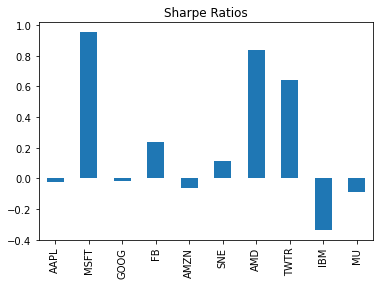

In [11]:
sharpe_ratios.plot.bar(title="Sharpe Ratios")